<a href="https://colab.research.google.com/github/preethishas2022/Qiskit_exercise-4/blob/main/Qiskit_Superposition_Entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superposition and Entanglement in Qiskit
This notebook demonstrates:
1. **Superposition** using a single qubit.
2. **Entanglement** using two qubits.
We will use Qiskit to create circuits, visualize the states, and measure outcomes.

In [8]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit qiskit-aer qiskit[visualization]
!pip install qiskit --quiet
!pip install qiskit-aer --quiet
!pip install pylatexenc



In [10]:
# ===========================
# Import Libraries
# ===========================

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline


## TASK-1: SUPERPOSITION


Circuit BEFORE measurement:


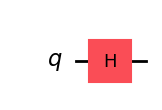


Superposition Statevector:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


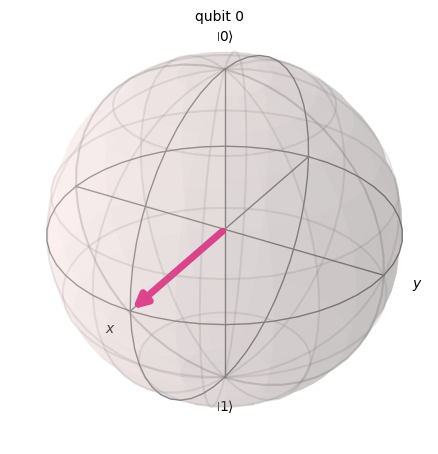

In [11]:
# 1️⃣ Create 1-qubit circuit
qc_super = QuantumCircuit(1)

# Apply Hadamard gate
qc_super.h(0)

# 2️⃣ Draw circuit BEFORE measurement
print("\nCircuit BEFORE measurement:")
display(qc_super.draw('mpl'))

# 3️⃣ Bloch sphere BEFORE measurement
state_super = Statevector.from_instruction(qc_super)
print("\nSuperposition Statevector:")
print(state_super)
display(plot_bloch_multivector(state_super))


Superposition Measurement Counts: {'0': 497, '1': 527}


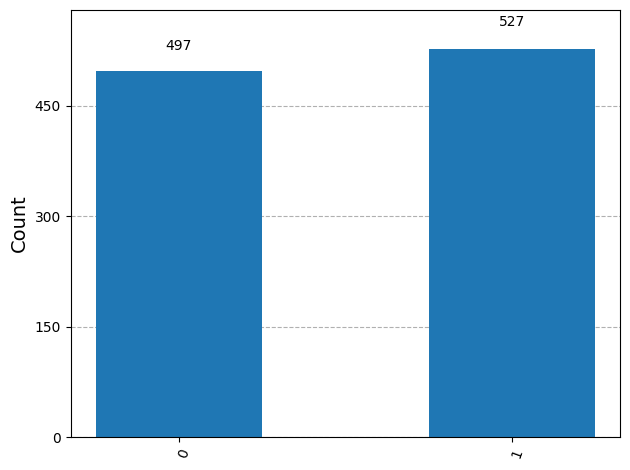


Circuit AFTER measurement:


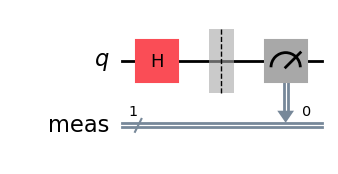

In [12]:

# 4️⃣ Add measurement and simulate
qc_super.measure_all()
simulator = AerSimulator()
job_super = simulator.run(qc_super, shots=1024)
result_super = job_super.result()
counts_super = result_super.get_counts()

print("Superposition Measurement Counts:", counts_super)
display(plot_histogram(counts_super))

# 5️⃣ Draw circuit AFTER measurement
print("\nCircuit AFTER measurement:")
display(qc_super.draw('mpl'))

## TASK-2: ENTANGLEMENT


Entanglement Circuit BEFORE measurement:


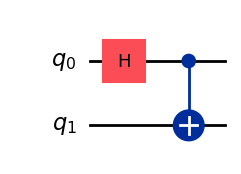


Entangled Statevector:
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


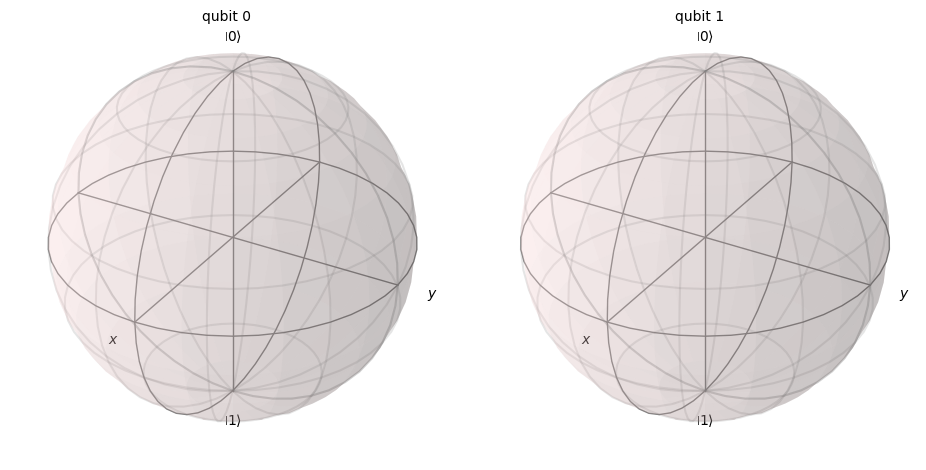

In [13]:
# 1️⃣ Create 2-qubit circuit
qc_ent = QuantumCircuit(2)

# Apply Hadamard on qubit 0
qc_ent.h(0)

# Apply CNOT (0 → 1)
qc_ent.cx(0, 1)

# 2️⃣ Draw circuit BEFORE measurement
print("\nEntanglement Circuit BEFORE measurement:")
display(qc_ent.draw('mpl'))

# 3️⃣ Get statevector BEFORE measurement
state_ent = Statevector.from_instruction(qc_ent)
print("\nEntangled Statevector:")
print(state_ent)
display(plot_bloch_multivector(state_ent))



Entanglement Measurement Counts: {'11': 534, '00': 490}


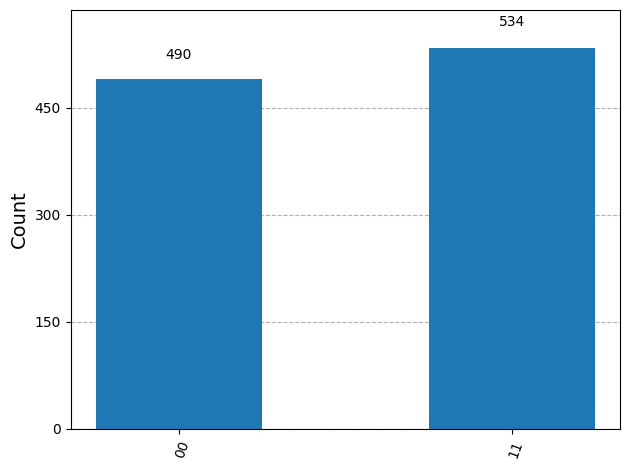


Entanglement Circuit AFTER measurement:


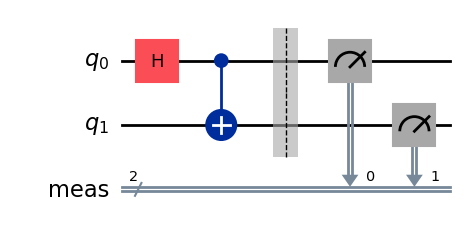

In [14]:

# 4️⃣ Add measurement and simulate
qc_ent.measure_all()
job_ent = simulator.run(qc_ent, shots=1024)
result_ent = job_ent.result()
counts_ent = result_ent.get_counts()

print("\nEntanglement Measurement Counts:", counts_ent)
display(plot_histogram(counts_ent))

# 5️⃣ Draw circuit AFTER measurement
print("\nEntanglement Circuit AFTER measurement:")
display(qc_ent.draw('mpl'))